# import libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# read file

{'Disease-3', 'Disease-1', 'Healthy', 'Disease-2'}


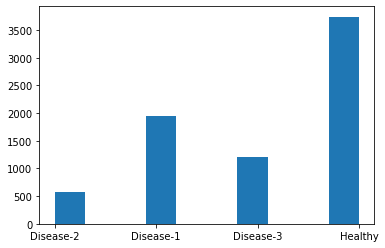

In [2]:
df = pd.read_csv("challenge_1_gut_microbiome_data.csv", index_col=False)

#get the bacteria info of all samples
X= df.iloc[:, 1:1095]

#get the class info of all samples
Y = df.iloc[:, 1095]

classes = set(list(df['disease']))
print(classes)
plt.hist(list(Y))
plt.savefig('barchart.png')

# check if any rows are non-zero

In [3]:
m2 = (df != 0).any()
a = m2.index[m2]

#check if any column is dropped
print(len(a) == len(df.columns))

True


no rows were all zero

# Count number of occurrences of each bacteria in samples

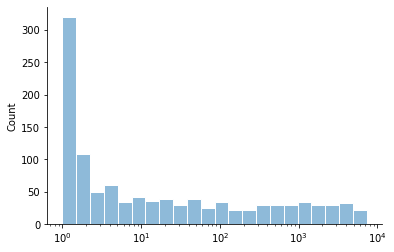

In [4]:
counts = []
for i in range(1, df.shape[1] - 1): #iterate over columns of dataframe
    counts.append(sum(df.iloc[:, i] > 0)) #append number of values greater than 0

#Generate Histogram
sns.histplot(counts, log_scale = True, bins = 22, edgecolor = 'white', alpha = 0.5)
sns.despine()

The number of times a bacteria occurs in multiple samples is low for most bacterias. We will further analyze this information below.

# check how many times Bacteria occur at least *threshold* number of samples

In [5]:
threshold = 20

bacteria_count = []
for i in range(1, 1095, 1):
    features = np.array(df.iloc[:, i])
    bacteria_count.append(np.count_nonzero(features))
    
bacteria_count_thresholded = []
for i in range(len(bacteria_count)):
    if bacteria_count[i] > threshold:
        bacteria_count_thresholded.append(i)

bacteria_count_thresholded_pos = []
for i in bacteria_count_thresholded:
    bacteria_count_thresholded_pos.append('Bacteria-{}'.format(i+1))

bact = pd.DataFrame(bacteria_count_thresholded_pos)
len(bact)

427

# check how many values are non-zero in the feature space (bacteria counts)

In [6]:
X.astype(bool).sum(axis=0).sum() /(len(X)* len(X.columns)) * 100

6.2152089375962065

6.22% of the values are non-zero. This is a sparse matrix.

# number of bacteria represented in different classes

In [7]:
disease_1 = df[df['disease'] == 'Disease-1']
disease_2= df[df['disease'] == 'Disease-2']
disease_3= df[df['disease'] == 'Disease-3']
healthy= df[df['disease'] == 'Healthy']

<BarContainer object of 4 artists>

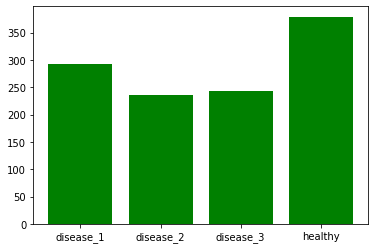

In [8]:
threshold = 20

disease_1_count = []
disease_2_count = []
disease_3_count = []
healthy_count = []

for i in range(1, 1095, 1):
    bacteria_i_diseases_1 = np.array(disease_1.iloc[:, i])
    bacteria_i_diseases_2 = np.array(disease_2.iloc[:, i])
    bacteria_i_diseases_3 = np.array(disease_3.iloc[:, i])
    bacteria_i_healthy = np.array(healthy.iloc[:, i])
   
    disease_1_count.append(np.count_nonzero(bacteria_i_diseases_1))
    disease_2_count.append(np.count_nonzero(bacteria_i_diseases_2))
    disease_3_count.append(np.count_nonzero(bacteria_i_diseases_3))
    healthy_count.append(np.count_nonzero(bacteria_i_healthy))

disease_1_filtered = []
for i in disease_1_count:
    if i > threshold:
        disease_1_filtered.append(i)
        
disease_2_filtered = []
for i in disease_2_count:
    if i > threshold:
        disease_2_filtered.append(i)

disease_3_filtered = []
for i in disease_3_count:
    if i > threshold:
        disease_3_filtered.append(i)

healthy_filtered = []
for i in healthy_count:
    if i > threshold:
        healthy_filtered.append(i)
        
class_thresholded = {'disease_1': len(disease_1_filtered), 'disease_2': len(disease_2_filtered), 'disease_3': len(disease_3_filtered),
                    'healthy': len(healthy_filtered)}

plt.bar(class_thresholded.keys(), class_thresholded.values(), color='g')

we can see that every class do not have all bacteria represented in different samples

# check how many bacteria are comparatively well represented across multiple classes

In [9]:
bacteria_index = []
for i in range(len(bacteria_count)):
    if (disease_1_count[i] > threshold) and (disease_2_count[i] > threshold) and (disease_3_count[i] > threshold) and (healthy_count[i] > threshold):
        bacteria_index.append(i)
len(bacteria_index)

203

only 203 bacteria are expressed in at least 20 samples across multiple classes

# EDA decision: High sparsity present in the data

because the data is highly sparse, we would need to work with models that can handle high sparsity. Decision trees are best for handling sparsity. The tree based algorithms have evolved over the years. 

Among the family of tree-based algorithms the best one is Xgboost. It stands for Extreme Gradient Boosting. For that reason, we have decided to go for this model. Another reason for choosing this model is that we can interpret tree-based algorithms easily. So we can interpret our results and get insight into the problem (a main reason we do not go for dimensionality reduction approaches). 